In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import collections

pd.set_option('display.max_colwidth', -1)

In [2]:
## Load and preprocess Data Sets

df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['review', 'sentiment']

df_2 = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
df_2.columns = ['review', 'sentiment']

# Sentiment Feedback Analysis

For this analysis a model to classify the sentiment of text data will be made using labelled Amazon reviews and tested on Yelp reviews.

## Making The Model

This model was made by checking each Amazon review for common keywords with unambiguous connotations, and using them to identify the message as a whole as positive or negative.

In [3]:
## View dataset
#df.head()
#df.sample(frac=.01)

In [4]:
#collections.Counter(" ".join(df["review"]).split()).most_common(100)

In [5]:
## Create Separate Arrays with Positive and negative keywords

positive_keywords = ['good', 'great', 'beautiful', 'compliments', 'winner', 'love', 'best']
negative_keywords = ['bad', 'waste', 'darn', 'complaint']
undecided_connotation = ['quality','very', 'recommend', 'not', 'and', 'I', 'works', 'charger', 'time']


In [6]:
## Create Features of the Amazon Data using Positive, negative, and undecided keywords

for key in positive_keywords:
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in negative_keywords:
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

for key in undecided_connotation:
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [7]:
## View Features for Confirmation
#df

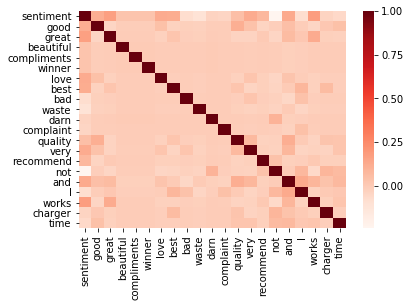

In [8]:
## Checking the independence of the features

sns.heatmap(df.corr(), cmap='Reds')
plt.show()

In [9]:
## Establishing Training and Outcome variables for use in our model

data = df[positive_keywords + negative_keywords + undecided_connotation]
target = df['sentiment']

In [10]:
## Importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

## Establish and store Model.
bnb = BernoulliNB()

## Fit model to the data.
bnb.fit(data, target)

## Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 322


## Using the Model On Data it Wasn't Trained With

Here, the model that was made using the amazon reviews was tested on Yelp reviews.

In [11]:
## View DataFrame
#df_2

In [12]:
## Create Features of the Yelp Data using Positive, negative, and undecided keywords

for key in positive_keywords:
    df_2[str(key)] = df_2.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in negative_keywords:
    df_2[str(key)] = df_2.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in undecided_connotation:
    df_2[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

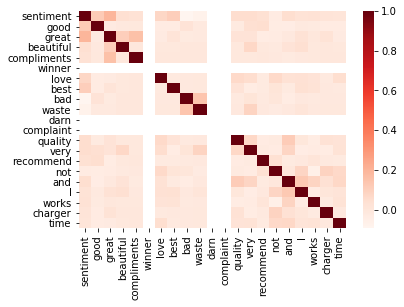

In [13]:
## Check independence of Features

sns.heatmap(df_2.corr(), cmap='Reds')
plt.show()

Gaps in the heatmap are assumed to be words that were found in Amazon reviews but not in Yelp reviews.

In [14]:
## Establish Training and Outcome Variables for our model

data_2 = df_2[positive_keywords + negative_keywords + undecided_connotation]
target_2 = df_2['sentiment']


In [15]:
## Fit model to the data.
bnb.fit(data_2, target_2)

## Classify, storing the result in a new variable.
y_pred_2 = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 439


# *Comments On The Model's Accuracy*#

The model was initially made using the words 'good' and 'bad' as features. Number of mislabeled points out of a total 1000 points for this initial model was 474.

The model's accuracy was increased by adding features in the form of keywords. I googled a way to count the most frequent words in a dataframe (the Counter function). I added words one by one to the list of features, tested the model and removed them if they didn't increase the accuracy of the model on the Amazon data. Ultimately, doing this got the model to reach a point where the number of mislabeled points out of a total 1000 points was 322 (for the Amazon data.

When the model was applied to the Yelp data, the number of mislabeled points out of a total 1000 points : 439. The Accuracy of the model in classifying the Yelp data can be increased by adding keywords from the yelp reviews.